In [991]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interp
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import sklearn.metrics as metrics

## PART 1: REtrieving and Preparing Data

Read the data from drug review

In [992]:
credit_data = pd.read_csv("./SouthGermanCredit/SouthGermanCredit.asc", sep=" ")

Get the columns name from the data

In [993]:
credit_data.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

The dataset includes attributes such as:
    'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
    'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
    'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'
Which stand for:
    'status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk'

## PART 2: Data Exploration

In [994]:
credit_data.columns = ['status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

After converting the column label, let check if there is any missing value in the data

In [995]:
credit_data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

There are no missing values in the dataset. So we can move on to the next step. Let's check the credit_risk values counts

In [996]:
credit_data['credit_risk'].value_counts()

1    700
0    300
Name: credit_risk, dtype: int64

There are 700 and 300 values for good and bad credit risk respectively. So the dataset is not balance. It is not good for further prediction.

In [997]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   credit_amount            1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

Seem like the data is fullfil with integer values. Hence we don't have to do any encoding for the data.

There are three numerical columns in the dataset. Which are age, credit amount and duration. Let first check scatter matrix.

array([[<AxesSubplot: xlabel='credit_amount', ylabel='credit_amount'>,
        <AxesSubplot: xlabel='duration', ylabel='credit_amount'>,
        <AxesSubplot: xlabel='age', ylabel='credit_amount'>],
       [<AxesSubplot: xlabel='credit_amount', ylabel='duration'>,
        <AxesSubplot: xlabel='duration', ylabel='duration'>,
        <AxesSubplot: xlabel='age', ylabel='duration'>],
       [<AxesSubplot: xlabel='credit_amount', ylabel='age'>,
        <AxesSubplot: xlabel='duration', ylabel='age'>,
        <AxesSubplot: xlabel='age', ylabel='age'>]], dtype=object)

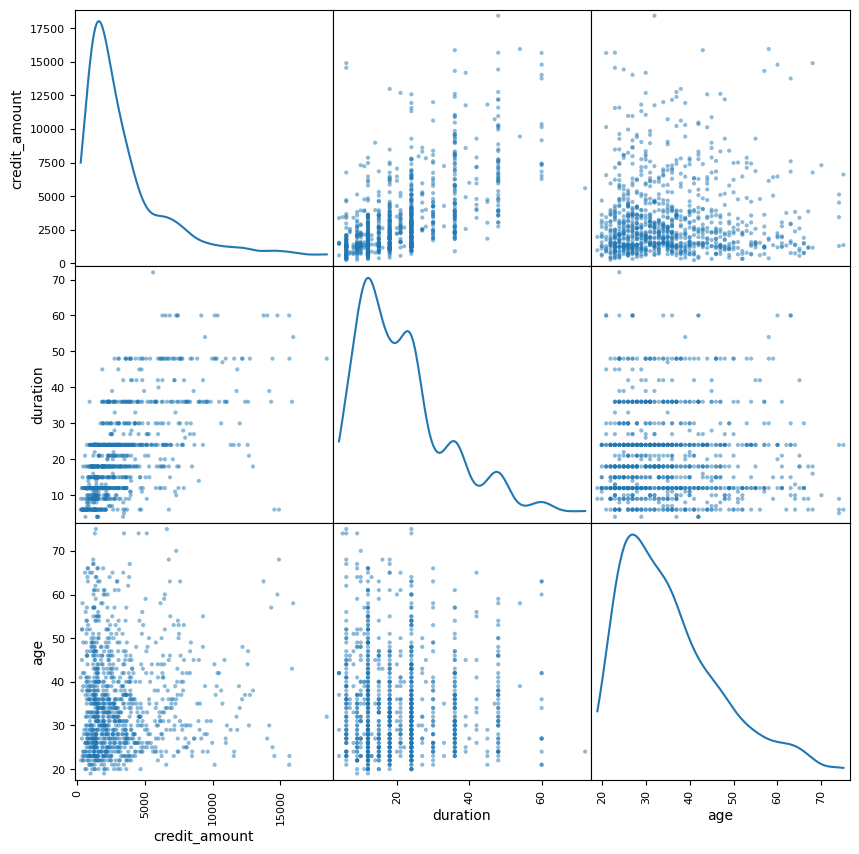

In [998]:
pd.plotting.scatter_matrix(credit_data[['credit_amount', 'duration', 'age']], figsize=(10,10), diagonal = 'kde', title = 'Scatter Matrix')

The scatter plot shows distribution of the numerical data is right skewed. Let's check the distribution of the age column

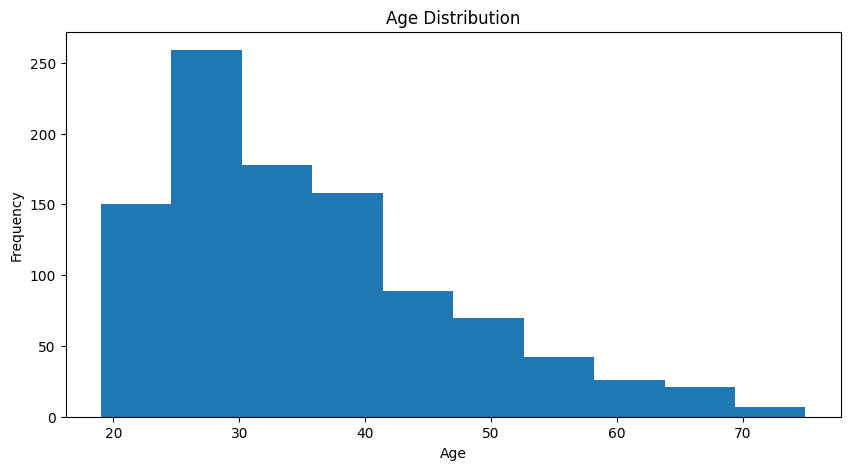

In [999]:
# Create the plot
fig, ax = plt.subplots()

# Plot a histogram of "age"
ax.hist(credit_data['age'])

# Show the plot
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
plt.show()

In [1000]:
credit_data['age'].describe()

count    1000.00000
mean       35.54200
std        11.35267
min        19.00000
25%        27.00000
50%        33.00000
75%        42.00000
max        75.00000
Name: age, dtype: float64

The age distribution of the dataset, the age is between 19 to 75 years old. The peak distribution for credit is between 20 to 30 years old. The distribution is right skewed.

/Users/nighd/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3543: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


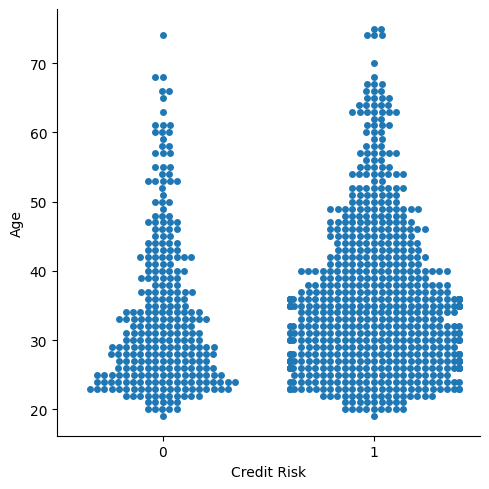

In [1001]:
credit_risk_age_dis = sns.catplot(data=credit_data, x="credit_risk", y="age", kind="swarm")
credit_risk_age_dis.set_titles("Credit Risk by Age")
credit_risk_age_dis.set_axis_labels("Credit Risk", "Age")

Look like the younger people is, the more bad credit risk they have. The older people is, the more good credit risk they have. Also for the good credit risk, the age is more spread out than the bad credit risk. Let check the personal status sex distribution

In [1002]:
credit_data['credit_amount'].describe()

count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: credit_amount, dtype: float64

The credit amount is between 250 and 18424. Based on the describe, we can say that the data is right skewed. I will split the credit amount into 4 bins of the distribution.

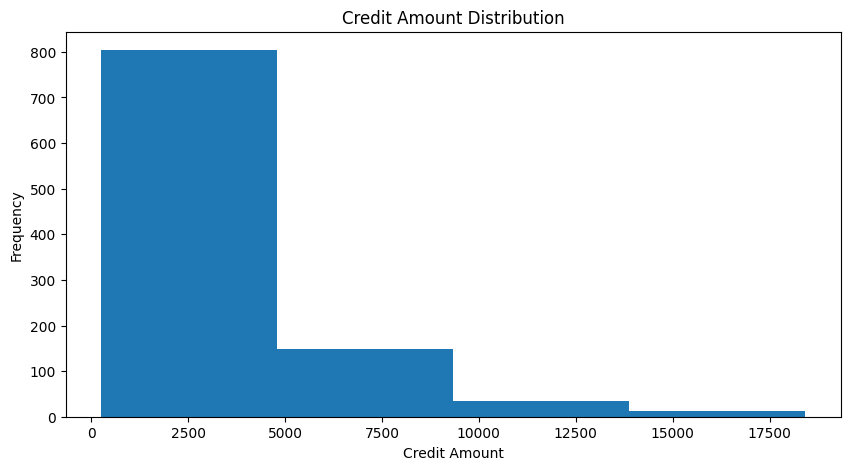

In [1003]:
# Create the plot
fig, ax = plt.subplots()

# Plot a histogram of "age"
ax.hist(credit_data['credit_amount'], bins=4)

# Show the plot
ax.set_title('Credit Amount Distribution')
ax.set_xlabel('Credit Amount')
ax.set_ylabel('Frequency')
plt.show()

As expected, the data is reight skewed. Let check the group of credit ammount versus the credit risk

In [1004]:
credit_data['credit_amount_bins'] = pd.cut(credit_data['credit_amount'], bins=4, labels=['1', '2', '3', '4'])
credit_data.groupby(['credit_amount_bins', 'credit_risk']).size()


credit_amount_bins  credit_risk
1                   0              217
                    1              587
2                   0               55
                    1               94
3                   0               19
                    1               16
4                   0                9
                    1                3
dtype: int64

Based on the distribution of credit ammount and credit risk, we can see that the credit ammount is higher for the bad credit risk. The credit ammount is lower for the good credit risk. Let check the duration distribution

In [1005]:
credit_data['duration'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: duration, dtype: float64

The duration is between 4 and 72 months. The data is right skewed. Let check the distribution of duration versus the credit risk

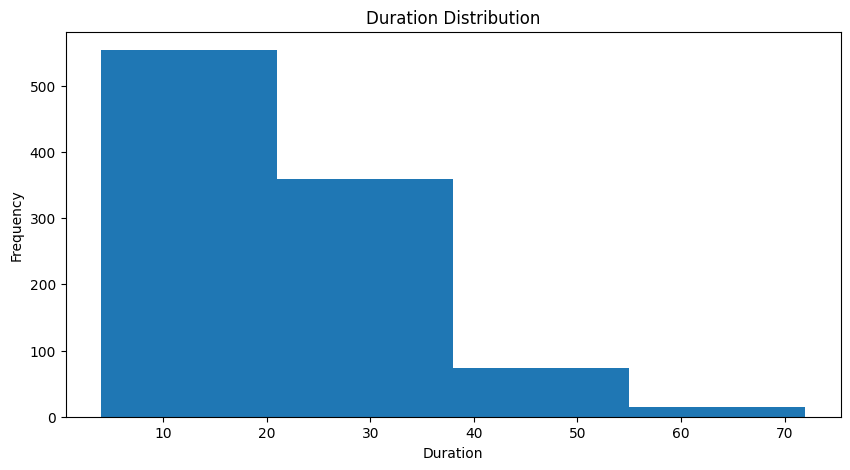

In [1006]:
# Create the plot
fig, ax = plt.subplots()

# Plot a histogram of "age"
ax.hist(credit_data['duration'], bins=4)

# Show the plot
ax.set_title('Duration Distribution')
ax.set_xlabel('Duration')
ax.set_ylabel('Frequency')
plt.show()

As expected, the duration distribution is right skewed. Now  i will check the credit risk distribution based on the duration

Text(0, 0.5, 'Frequency')

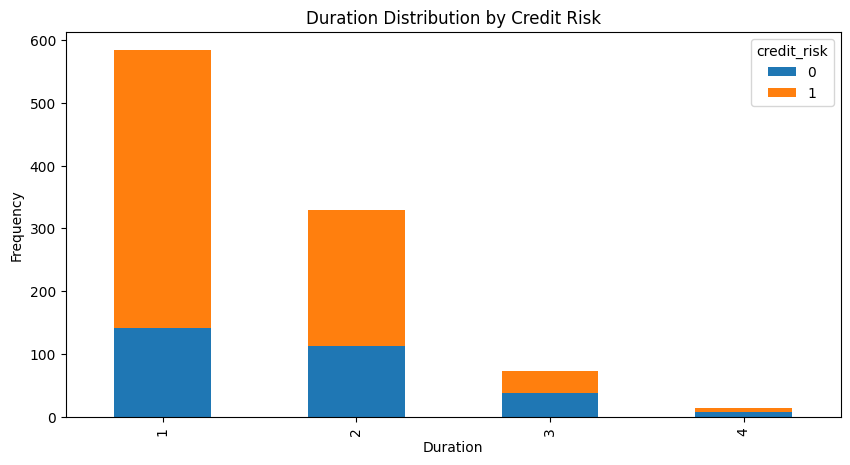

In [1007]:
credit_data['duration_bins'] = pd.cut(credit_data['duration'], bins=4, labels=['1', '2', '3', '4'])
duration_bin_plot = credit_data.groupby(['duration_bins', 'credit_risk']).size().unstack().plot(kind='bar', stacked=True, title = 'Duration Distribution by Credit Risk')
duration_bin_plot.set_xlabel('Duration')
duration_bin_plot.set_ylabel('Frequency')


As can be seen from the distribution, the duration is higher for the bad credit risk. The duration is lower for the good credit risk. After checking three numerical columns, let check other columns.

In [1008]:
# use pearson correlation
df_corr = credit_data.corr(method='pearson')
filter_corr = df_corr.unstack().sort_values(kind="quicksort", ascending=False).reset_index()
filter_corr = filter_corr[filter_corr['level_0'] != filter_corr['level_1']]
credit_risk_only = filter_corr[filter_corr['level_0'] == 'credit_risk']
credit_risk_only.sort_values(by=0, ascending=False)

/var/folders/q1/3md20s617wl5jjxdb1c9d1y00000gn/T/ipykernel_67612/3937831705.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = credit_data.corr(method='pearson')


,level_0,level_1,0
27,credit_risk,status,0.350847
49,credit_risk,credit_history,0.228785
59,credit_risk,savings,0.178943
94,credit_risk,employment_duration,0.116002
101,credit_risk,other_installment_plans,0.109844
125,credit_risk,age,0.091272
131,credit_risk,personal_status_sex,0.088184
197,credit_risk,number_credits,0.045732
212,credit_risk,telephone,0.036466
229,credit_risk,other_debtors,0.025137


According to the correlation matrix, the most correlated columns with the credit risk is the status and duration. I will pick 5 positive and 5 negative correlated columns to check the distribution of the credit risk. The duration, credit amount, and age has been check the distribution, so i will not check it again. Let first check the status

In [1009]:
credit_data['status'].value_counts()

4    394
1    274
2    269
3     63
Name: status, dtype: int64

Text(0, 0.5, 'Frequency')

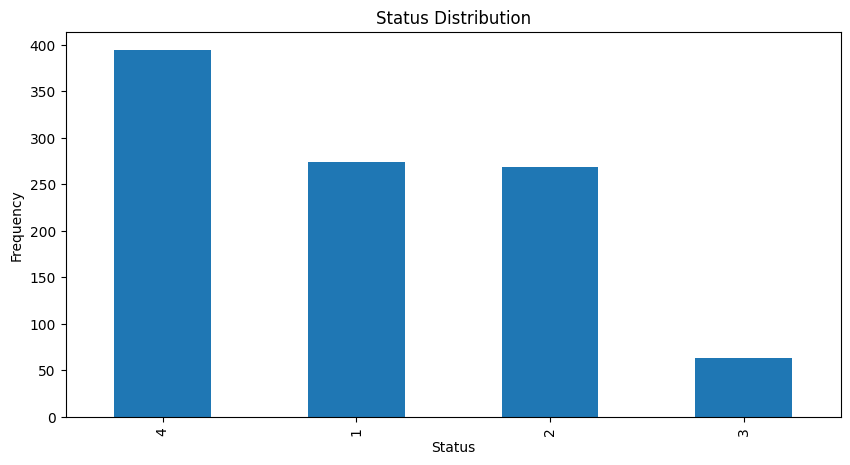

In [1010]:
credit_data_plot = credit_data['status'].value_counts().plot(kind='bar', title = 'Status Distribution')
credit_data_plot.set_xlabel('Status')
credit_data_plot.set_ylabel('Frequency')


The "... >= 200 DM / salary for at least 1 year"  value has the highest frequency of the status, which is ~ 333. The "... < 0 DM" value has the lowest frequency of the status, which is ~ 40. Let check the distribution of the status versus the credit risk

In [1011]:
statusSize = credit_data.groupby(['status', 'credit_risk']).size()
print(statusSize/statusSize.groupby(level=0).sum())

status  credit_risk
1       0              0.492701
        1              0.507299
2       0              0.390335
        1              0.609665
3       0              0.222222
        1              0.777778
4       0              0.116751
        1              0.883249
dtype: float64


The distribution of credit risk versus the status is not balance. The good credit risk of the "... >= 200 DM / salary for at least 1 year" and "0<= ... < 200 DM" are higher than 50% of the bad credit risk while the bad credit risk of the rest is increasing. Seem like the more checking account balance, the more good credit risk they have. Let check the credit history

In [1012]:
credit_data['credit_history'].value_counts()

2    530
4    293
3     88
1     49
0     40
Name: credit_history, dtype: int64

The most frequent value of the credit history is "cno credits taken/all credits paid back duly". The least frequent value of the credit history is "delay in paying off in the past  ". Let check the distribution of the credit history versus the credit risk

Text(0, 0.5, 'Frequency')

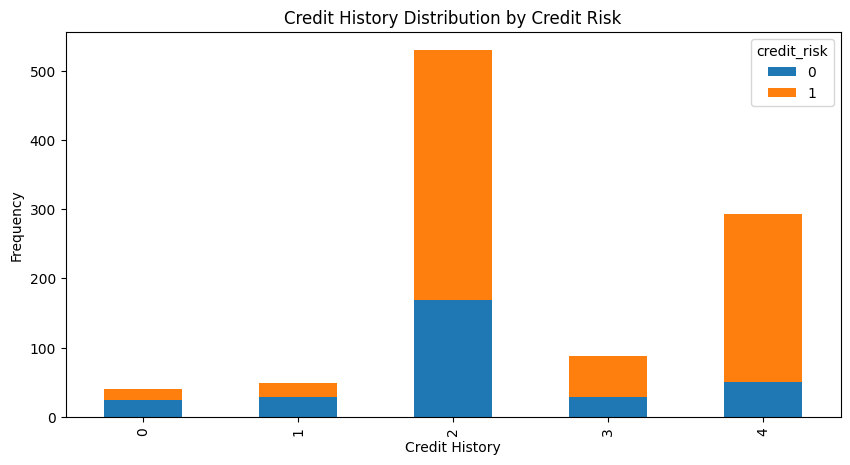

In [1013]:
credit_data_plot = credit_data.groupby(['credit_history', 'credit_risk']).size().unstack().plot(kind='bar', stacked=True, title = 'Credit History Distribution by Credit Risk')
credit_data_plot.set_xlabel('Credit History')
credit_data_plot.set_ylabel('Frequency')


From the credit history distribution, the good credit risk of the "no credits taken/all credits paid back duly" and "all credits at this bank paid back duly" are higher than 50% of the bad credit risk while the bad credit risk of "delay in paying off in the past" and critical account/other credits elsewhere" are increasing. Seem like the more bad credit risk is, the lower the credit the bank will give. Let's check savings

In [1014]:
credit_data['savings'].value_counts()

1    603
5    183
2    103
3     63
4     48
Name: savings, dtype: int64

Look like if the customer has no savings account, they will have higher chance of receiving credit from the bank. Let check the distribution of the savings versus the credit risk

Text(0, 0.5, 'Frequency')

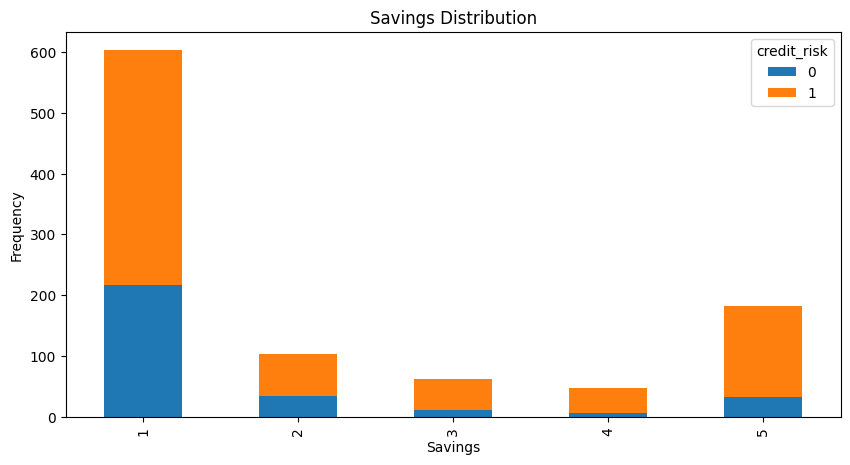

In [1015]:
saving_plot = credit_data.groupby(['savings', 'credit_risk']).size().unstack().plot(kind='bar', stacked=True, title='Savings Distribution')
saving_plot.set_xlabel('Savings')
saving_plot.set_ylabel('Frequency')

The bad credit risk propotion of the "unknown/no savings account" is higher than the good credit. Nothing can be said from the rest of the savings. Let check the employment duration

Text(0, 0.5, 'Frequency')

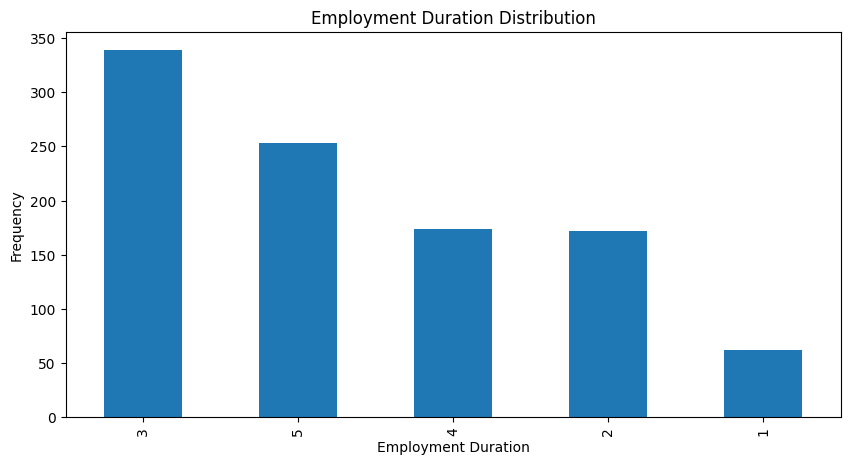

In [1016]:
employment_plot = credit_data['employment_duration'].value_counts().plot(kind='bar', title='Employment Duration Distribution')
employment_plot.set_xlabel('Employment Duration')
employment_plot.set_ylabel('Frequency')

The most frequent value of the employment duration is "1 <= ... < 4 yrs". The least frequent value of the employment duration is "unemployed". It is understandable since if you don't have a job, you will not have a salary, then you won't have any credit. While the more years you have a job, the higher chance you will have a credit. Let check the distribution of the employment duration versus the credit risk


Text(0, 0.5, 'Frequency')

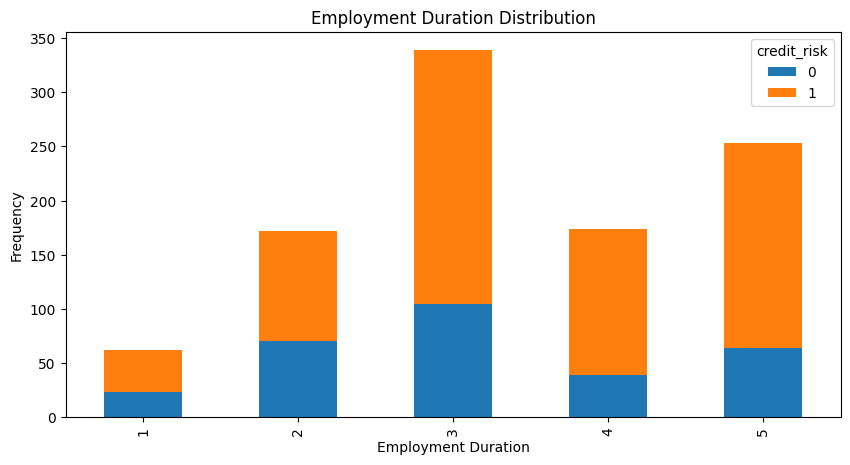

In [1017]:
employment_duration_plot = credit_data.groupby(['employment_duration', 'credit_risk']).size().unstack().plot(kind='bar', stacked=True, title='Employment Duration Distribution')
employment_duration_plot.set_xlabel('Employment Duration')
employment_duration_plot.set_ylabel('Frequency')

Nothing much can be said from the employment duration. Let check the other installment plans

Text(0, 0.5, 'Frequency')

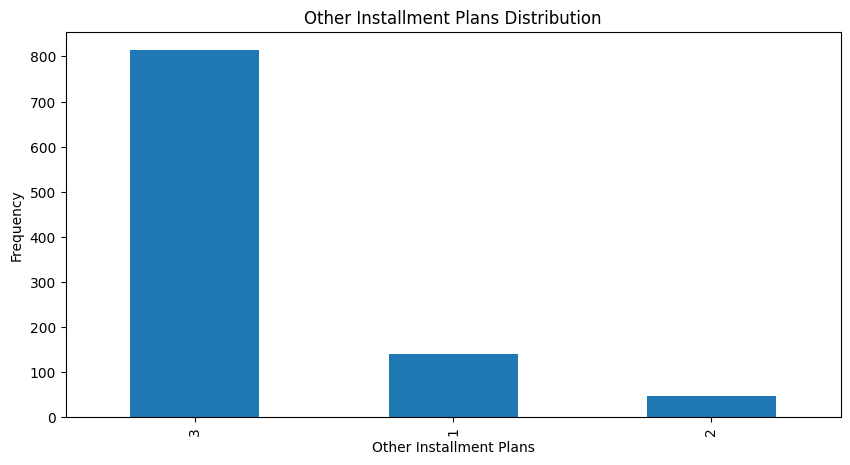

In [1018]:
other_plans = credit_data['other_installment_plans'].value_counts().plot(kind='bar', title='Other Installment Plans Distribution')
other_plans.set_xlabel('Other Installment Plans')
other_plans.set_ylabel('Frequency')

The most frequent value of the other installment plans is "none". Seem like the user who has no other installment plans will have higher chance of receiving credit from the bank. Let check the distribution of the other installment plans versus the credit risk

Text(0, 0.5, 'Frequency')

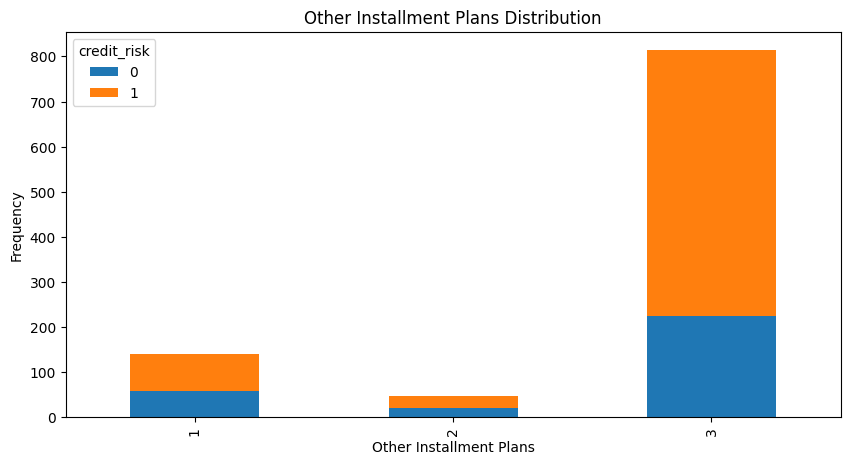

In [1019]:
other_plans_cd = credit_data.groupby(['other_installment_plans', 'credit_risk']).size().unstack().plot(kind='bar', stacked=True, title = 'Other Installment Plans Distribution')
other_plans_cd.set_xlabel('Other Installment Plans')
other_plans_cd.set_ylabel('Frequency')

Based on the chart, the bad credit risk propotion of the "bank" is higher than the good credit. Now let check the negative value correlation, property

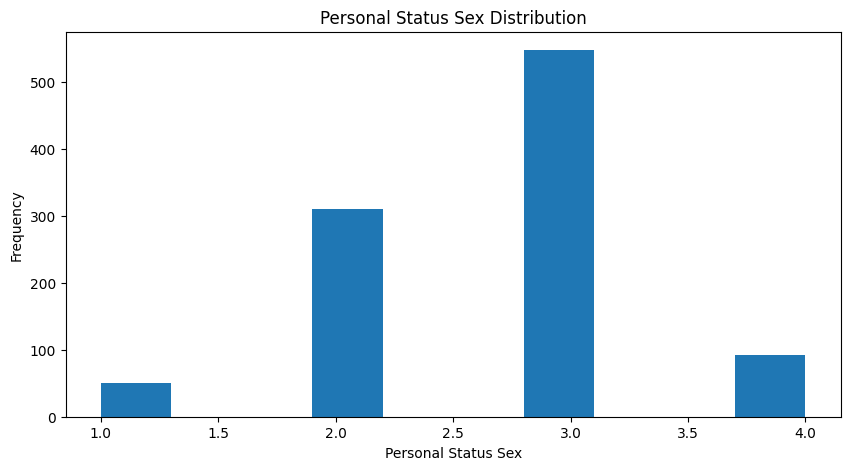

In [1020]:
# Create the plot
fig, ax = plt.subplots()

# Plot a histogram of "age"
ax.hist(credit_data['personal_status_sex'])

# Show the plot
ax.set_title('Personal Status Sex Distribution')
ax.set_xlabel('Personal Status Sex')
ax.set_ylabel('Frequency')
plt.show()

According to the categorial mapping, the value is:
 1. : male : divorced/separated           
 2. : female : non-single or male : single
 3. : male : married/widowed              
 4. : female : single
Based on the distribution chart, the maried male borrow more money than the rest. Let see the credit risk of the personal status sex distribute

In [1021]:
credit_data.groupby(['personal_status_sex', 'credit_risk']).size()

personal_status_sex  credit_risk
1                    0               20
                     1               30
2                    0              109
                     1              201
3                    0              146
                     1              402
4                    0               25
                     1               67
dtype: int64

The distribution of credit risk in per personal status sex is well distributed. The good credit seem higher than the bad one and the married male is the has the highest good credit risk which is more than 2/3 of the bad credit risk.

In [1022]:
credit_data['purpose'].value_counts()

3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: purpose, dtype: int64

For the purpose of credit, mostly people take the credit for car or furniture/equipment. Then comes other, car(used) and car(new)

Text(0, 0.5, 'Frequency')

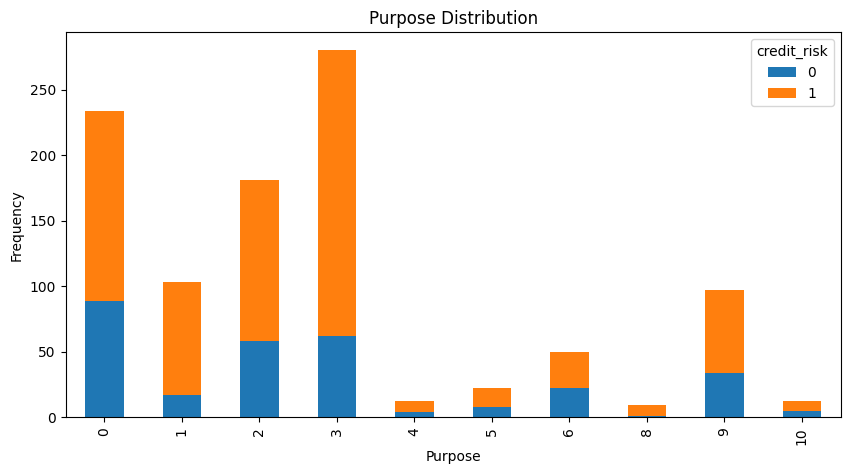

In [1023]:
purpose_cd = credit_data.groupby(['purpose', 'credit_risk']).size().unstack().plot(kind='bar', stacked=True, title = 'Purpose Distribution')
purpose_cd.set_xlabel('Purpose')
purpose_cd.set_ylabel('Frequency')

In [1024]:
purposeSize = credit_data.groupby(['purpose', 'credit_risk']).size()
print(purposeSize/purposeSize.groupby(level=0).sum().sort_values(ascending=False))

purpose  credit_risk
0        0              0.380342
         1              0.619658
1        0              0.165049
         1              0.834951
2        0              0.320442
         1              0.679558
3        0              0.221429
         1              0.778571
4        0              0.333333
         1              0.666667
5        0              0.363636
         1              0.636364
6        0              0.440000
         1              0.560000
8        0              0.111111
         1              0.888889
9        0              0.350515
         1              0.649485
10       0              0.416667
         1              0.583333
dtype: float64


Among the top 3 frequent purpose, the bad credit risk of other purpose is higher than the rest. Between used car and new car, the bad credit risk of used car is higher than the new car.

In [1025]:
two_columns_relationship = filter_corr[filter_corr[0] > 0.3]
two_columns_relationship

,level_0,level_1,0
21,duration,credit_amount,0.624988
22,credit_amount,duration,0.624988
23,credit_history,number_credits,0.437066
24,number_credits,credit_history,0.437066
25,telephone,job,0.383022
26,job,telephone,0.383022
27,credit_risk,status,0.350847
28,status,credit_risk,0.350847
29,housing,property,0.342969
30,property,housing,0.342969


There are relationship between duration, credit_amount and credit_history vs number_credits. Let use scatter matrix to see those relationship

array([[<AxesSubplot: xlabel='credit_amount', ylabel='credit_amount'>,
        <AxesSubplot: xlabel='duration', ylabel='credit_amount'>],
       [<AxesSubplot: xlabel='credit_amount', ylabel='duration'>,
        <AxesSubplot: xlabel='duration', ylabel='duration'>]],
      dtype=object)

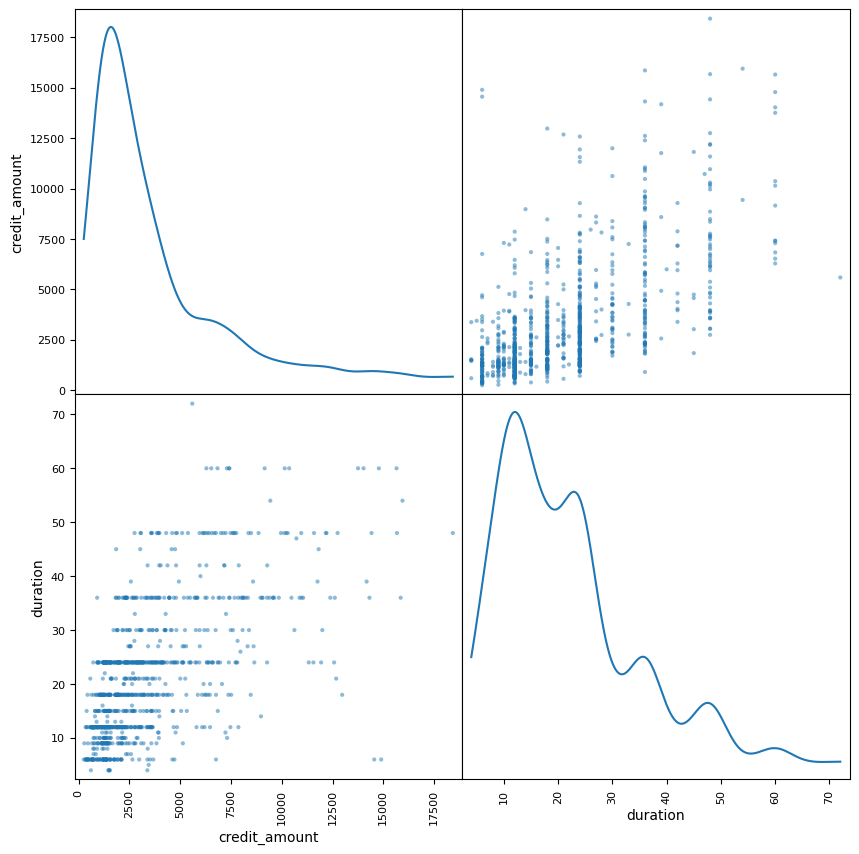

In [1026]:
pd.plotting.scatter_matrix(credit_data[['credit_amount', 'duration']], figsize=(10,10), diagonal = 'kde')

From the scatter matrix, it seem the more credit_amount is, the longer the duration is. And most of the records are low credit amount and low duration.

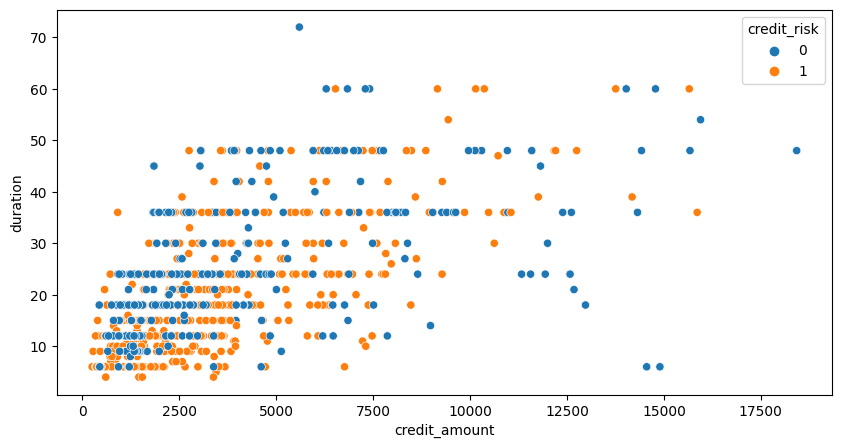

In [1027]:
ax = sns.scatterplot(x="credit_amount", y="duration", hue="credit_risk", data=credit_data)


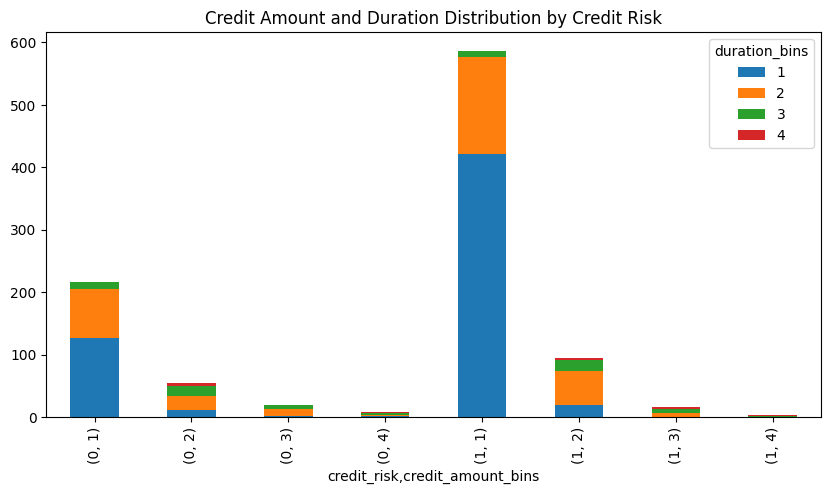

In [1028]:
distribution_group = credit_data.groupby(['credit_risk', 'credit_amount_bins', 'duration_bins']).size().unstack().plot(kind='bar', stacked=True, title = 'Credit Amount and Duration Distribution by Credit Risk')

Based on the distribution of credit amount, duration and credit risk. The distribution mainly located on:
1. credit amount between 0 to 5000
2. duration between 0 to 2
3. credit risk is good

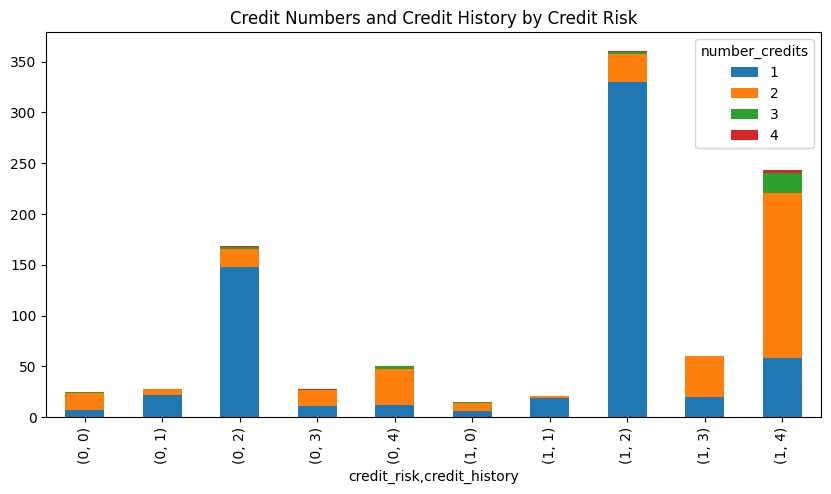

In [1029]:
distribution_group = credit_data.groupby(['credit_risk', 'credit_history', 'number_credits']).size().unstack().plot(kind='bar', stacked=True, title = 'Credit Numbers and Credit History by Credit Risk')

For the number_credits, the numerical is mapped with the following:
 1. : 1   
 2. : 2-3 
 3. : 4-5 
 4. : >= 6

The most frequent value of the number_credits is 1. The second one is more than 2-3 credits. While the least frequent value of the number_credits is more than 6 credits. It can be tell that the more credits the customer has, the less chance they will get another credit from the bank. While who has 1 credit, they will have higher chance of getting another credit from the bank. Also from the chart, we can say that, the lest number of credits the customer has, the more good credit risk they have.

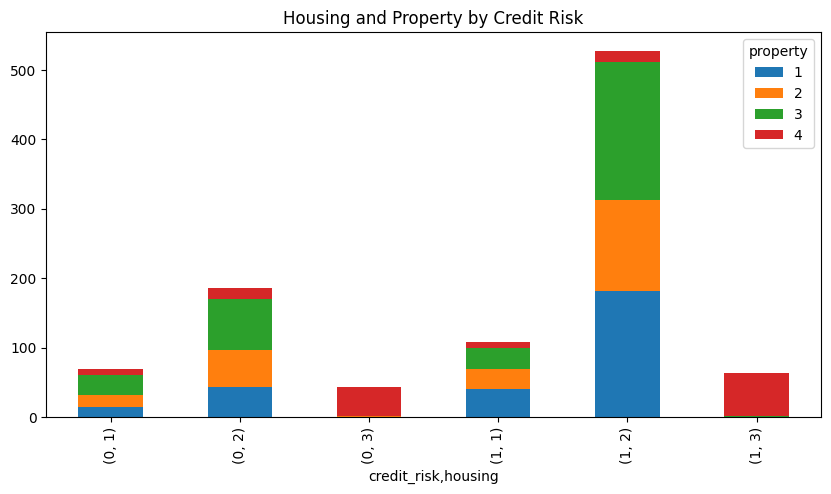

In [1030]:
distribution_group = credit_data.groupby(['credit_risk', 'housing', 'property']).size().unstack().plot(kind='bar', stacked=True, title = 'Housing and Property by Credit Risk')

For the housing mapping, the value is:
 1. : rent
 2. : own
 3. : for free

And the property mapping, the value is:
 1. : unknown / no property                    
 2. : car or other                             
 3. : building soc. savings agr./life insurance
 4. : real estate                              

Based on the mapping, the customer who own a house and has building soc. savings agr./life insurance will have higher number of getting credit from the bank. While the customer who has a house for free and own an real estate will have lower chance of getting credit from the bank. Which is make sense since you have real estate, you don't need a credit from the bank. The good credit distribution is higher than the bad credit. The biggest bad credit risk is the customer who has a house and building soc. savings agr./life insurance.


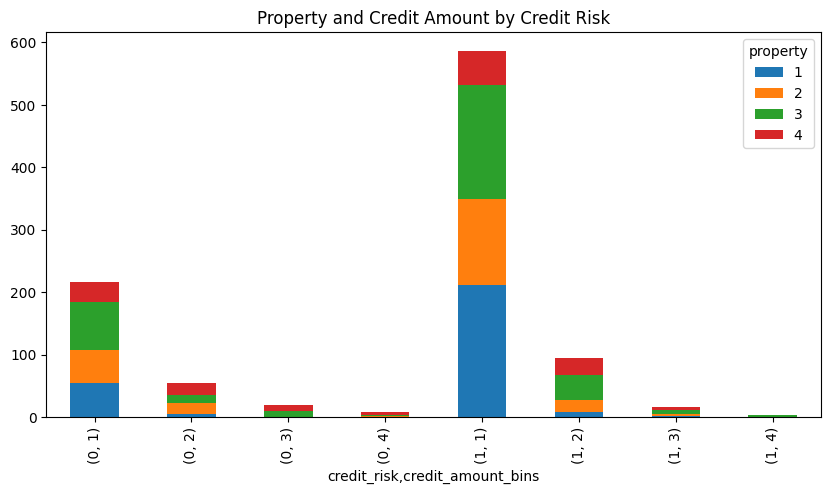

In [1031]:
distribution_group = credit_data.groupby(['credit_risk', 'credit_amount_bins', 'property']).size().unstack().plot(kind='bar', stacked=True, title = 'Property and Credit Amount by Credit Risk')

The mapping for the property is:
 1. : unknown / no property                    
 2. : car or other                             
 3. : building soc. savings agr./life insurance
 4. : real estate
The mapping for credit amount is:
 1. : < 5000
 2. : 5000 <= ... < 9000
 3. : 9000 <= ... < 13000
 4. : >= 13000
Based on the distribution, the highest number of customer who has credit amount lower than 5000. And the lowest number of credit customer is who has credit amount more than 13000. For the customer who has credit amount lower than 5000, the distribution of unknown/no property is similar to the building soc. savings agr./life insurance. And its good credit risk is higher than the bad credit risk. More interesting thing is, who own an real estate and want to borrow money from the bank, they not borrow more than 5000. And the bank want to give credit to the customer who has building soc. savings agr./life insurance more than the rest

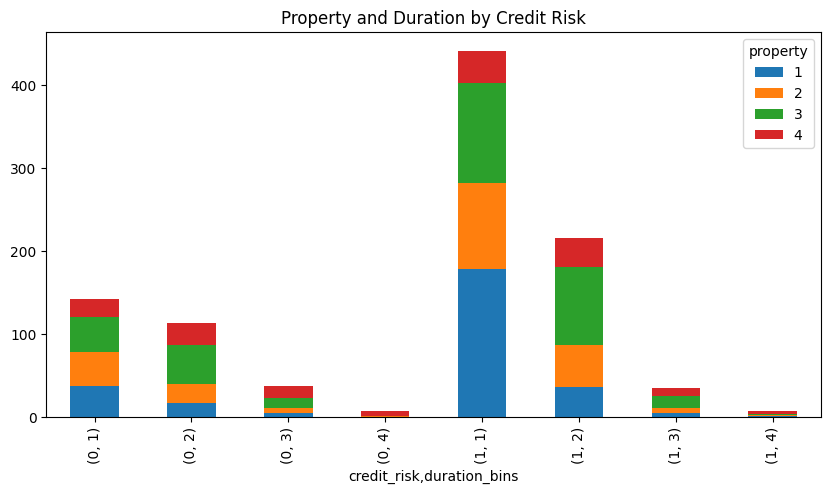

In [1032]:
distribution_group = credit_data.groupby(['credit_risk', 'duration_bins', 'property']).size().unstack().plot(kind='bar', stacked=True, title = 'Property and Duration by Credit Risk')

The duration mapping is:
1. < 24
2. 24 <= ... < 36
3. 36 <= ... < 48
4. >= 54
From the distribution chart, the number of credit with less than 24 months distribution is the highest and the number of credit with more than 54 months distribution is the lowest, following with the good and bad credit distribution. Again, the one who don't have any property or unknown/no property will have higher chance of getting credit from the bank. And the one who has real estate will have lower chance of getting credit from the bank. The good credit risk of the customer who has real estate is higher than the bad credit risk.

## Part 3

Now moving to the building model part. At first, I will filter the credit risk target from the dataset.

First part is classification. Let choose the model and the features. First, let choose feature using  the selectKBest function

In [1034]:
credit_data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'credit_amount',
       'savings', 'employment_duration', 'installment_rate',
       'personal_status_sex', 'other_debtors', 'present_residence', 'property',
       'age', 'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk',
       'credit_amount_bins', 'duration_bins'],
      dtype='object')

In [1035]:
df_feature = credit_data[['status', 'duration', 'credit_history', 'purpose', 'credit_amount',
       'savings', 'employment_duration', 'installment_rate',
       'personal_status_sex', 'other_debtors', 'present_residence', 'property',
       'age', 'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker']]
df_target = credit_data['credit_risk']

Get the categorical features from the columns

In [1036]:
best=SelectKBest(score_func=f_classif, k=20)
fit1=best.fit(df_feature,df_target)
data_scores=pd.DataFrame(fit1.scores_)
data_columns=pd.DataFrame(df_feature.columns)
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(20,'Score'))

                    Feature       Score
0                    status  140.092281
2            credit_history   55.123045
1                  duration   48.333790
5                   savings   33.013573
4             credit_amount   24.482854
11                 property   20.718883
6       employment_duration   13.612739
13  other_installment_plans   12.188660
12                      age    8.383749
8       personal_status_sex    7.821743
19           foreign_worker    6.769174
7          installment_rate    5.259417
15           number_credits    2.091652
18                telephone    1.328891
16                      job    1.070584
9             other_debtors    0.630992
14                  housing    0.327746
3                   purpose    0.322698
17            people_liable    0.009071
10        present_residence    0.008787


Based on the selectKBest score, I will choose the first 12 label as selected columns use for building the model.

In [1037]:
selected_columns = ['status', 'credit_history', 'duration', 'savings', 'credit_amount','property','employment_duration','age','other_installment_plans','installment_rate','personal_status_sex', 'foreign_worker']

In [1038]:
X_train, X_test, y_train, y_test = train_test_split(credit_data[selected_columns], credit_data['credit_risk'], test_size=0.2, random_state=42)

Get the train and test data for the model using selected columns above

In [1039]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.39      0.48        62
           1       0.77      0.90      0.83       138

    accuracy                           0.74       200
   macro avg       0.70      0.64      0.65       200
weighted avg       0.72      0.74      0.72       200



/Users/nighd/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


After using logistic regression, the accuracy is 0.73. The precision is 0.77 and the recall is 0.90. The f1 score is 0.83.

Now let try to use the random forest classifier

Text(0, 0.5, 'Error Rate')

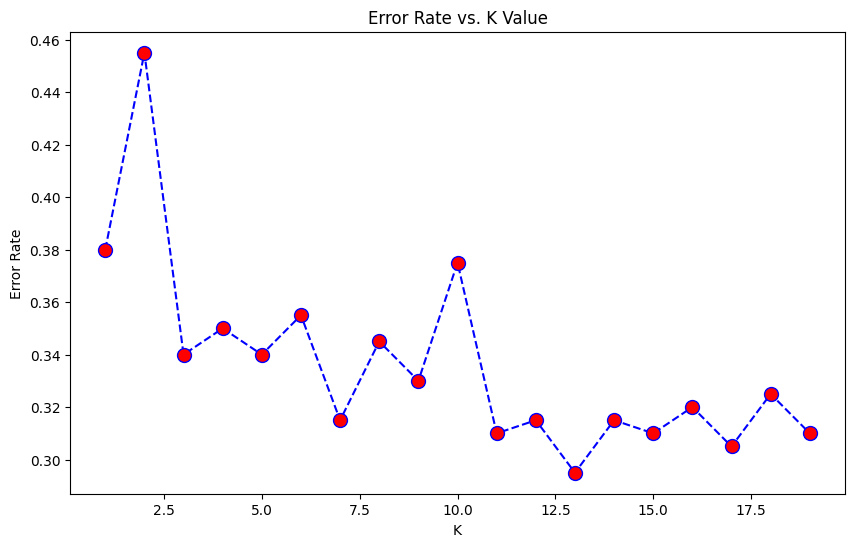

In [1040]:
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
            markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Firstly, let try to find the best parameter for the random forest classifier, after looping the parameter, the best parameter of the random forest classifier with the lowest error rate is 13. Hence I will use the parameter 13 for the random forest classifier.

In [1041]:
knn = KNeighborsClassifier(n_neighbors=13)
model = knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
print(metrics.classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.62      0.13      0.21        62
           1       0.71      0.96      0.82       138

    accuracy                           0.70       200
   macro avg       0.66      0.55      0.52       200
weighted avg       0.68      0.70      0.63       200



The score of the random forest classifier is 0.74. The precision is 0.71 and the recall is 0.96. The f1 score is 0.82.

Now moving to the regression part. Let choose the model and the features. First, I will use KMeans to find the best cluster for the dataset. The first step is transform the numerical data

In [1042]:
numerical_df = credit_data[['duration', 'credit_amount', 'age']]
standard_scaler = StandardScaler()
numdf_scaled = standard_scaler.fit_transform(numerical_df)

Apply elbow method to find the best k value

/Users/nighd/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nighd/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nighd/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nighd/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Inertia')

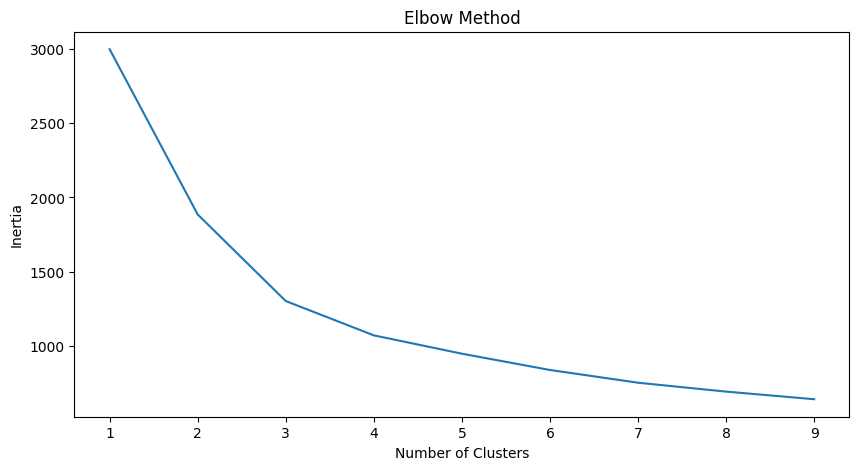

In [1043]:
elbow_list = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(numdf_scaled)
    elbow_list.append(kmeans.inertia_)

fig, ax = plt.subplots()
ax.plot(range(1, 10), elbow_list)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')


By using the elbow method, the best k value is 3. Hence I will use the k value 3 for the KMeans.

In [1044]:
km_cluster = KMeans(n_clusters=3)
km_model = km_cluster.fit_predict(numdf_scaled)

/Users/nighd/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0.98, 'K-Means Clustering')

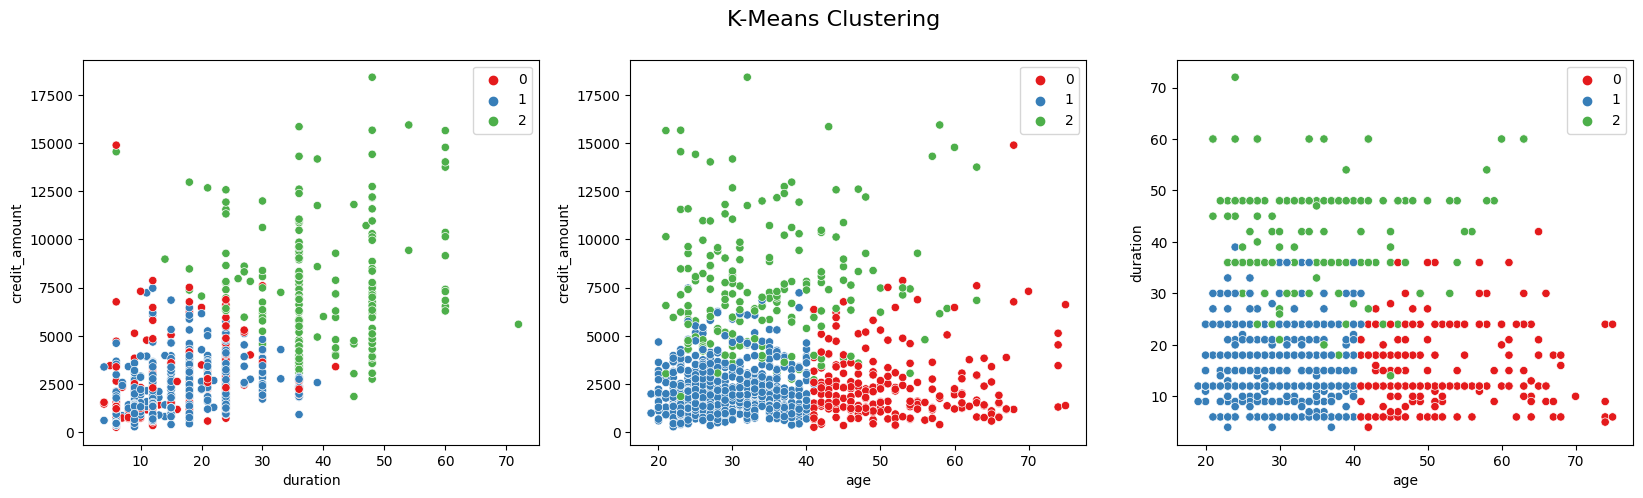

In [1045]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(x=credit_data['duration'], y=credit_data['credit_amount'], hue=km_model, ax=ax[0], palette='Set1')
sns.scatterplot(x=credit_data['age'], y=credit_data['credit_amount'], hue=km_model, ax=ax[1], palette='Set1')
sns.scatterplot(x=credit_data['age'], y=credit_data['duration'], hue=km_model, ax=ax[2], palette='Set1')
fig.suptitle('K-Means Clustering', fontsize=16)

Plotting the data via cluster 3 to find the distribution of the numerical data

In [1046]:
df_clustered = credit_data[['duration', 'credit_amount', 'age']]
df_clustered['cluster'] = km_model

/var/folders/q1/3md20s617wl5jjxdb1c9d1y00000gn/T/ipykernel_67612/3223578408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustered['cluster'] = km_model


In [1047]:
df_clustered.groupby('cluster').mean()

,duration,credit_amount,age
cluster,,,
0,15.774775,2395.963964,51.666667
1,16.940577,2209.028862,29.718166
2,39.275132,7609.661376,34.751323


The cluster 0 are the youngest customer. The cluster 1 are the middle age customer. The cluster 2 are the oldest customer. The cluster 0 are the customer who has the lowest credit amount. The cluster 1 are the customer who has the middle credit amount. The cluster 2 are the customer who has the highest credit amount. The cluster 0 are the customer who has the middle duration. The cluster 1 are the customer who has the highest duration. The cluster 2 are the customer who has the lowest duration.

In [1048]:
categories = ['status', 'credit_history', 'purpose',
       'savings', 'employment_duration', 'installment_rate',
       'personal_status_sex', 'other_debtors', 'present_residence', 'property',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

Now i will split the numerical data and categorical data, then apply the cluster to the numerical data. After that, I will combine the numerical data and categorical data.

In [1049]:
temp_credit_data = credit_data.copy()[categories]
data_model_cluster = pd.concat([temp_credit_data, df_clustered], axis=1)

In [1050]:
x_train_cluster, x_test_cluster, y_train_cluster, y_test_cluster = train_test_split(data_model_cluster.drop('credit_risk', axis=1), data_model_cluster['credit_risk'], test_size=0.2, random_state=0)

Create the train and test data for the model using cluster method

In [1051]:
param_tuning = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'gamma': [0, 0.25, 0.5, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'n_jobs': range(1, 5)}

xgb_model = RandomizedSearchCV(XGBClassifier(), param_distributions=param_tuning, n_iter=25, scoring='roc_auc')

Tuning the parameter for the xgb classigier, the tuning parameter is:
1. max_depth
2. learning_rate
3. n_estimators
4. gamma
5. min_child_weight
6. n_jobs
To explain, the max_depth is the maximum depth of the tree. The learning_rate is the learning rate of the model. The n_estimators is the number of trees in the model. The gamma is the minimum loss reduction required to make a further partition on a leaf node of the tree. The min_child_weight is the minimum sum of instance weight(hessian) needed in a child. The n_jobs is the number of parallel threads used to run xgboost.

In [1052]:
xgb_model.fit(x_train_cluster, y_train_cluster)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=25,
                   param_distributions={'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3, 0.4, 0.5],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                                        'n_jobs': range(1, 5)},
                   scoring='roc_auc')

In [1053]:
print(metrics.classification_report(y_test_cluster, xgb_model.predict(x_test_cluster)))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50        68
           1       0.74      0.90      0.82       132

    accuracy                           0.73       200
   macro avg       0.71      0.65      0.66       200
weighted avg       0.72      0.73      0.71       200

0.74375


After tuning the parameter, the model give the score is:
1. Accuracy: 0.76
2. Precision: 0.76
3. Recall: 0.94
4. F1 score: 0.84

In [1054]:
xgb_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=900, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

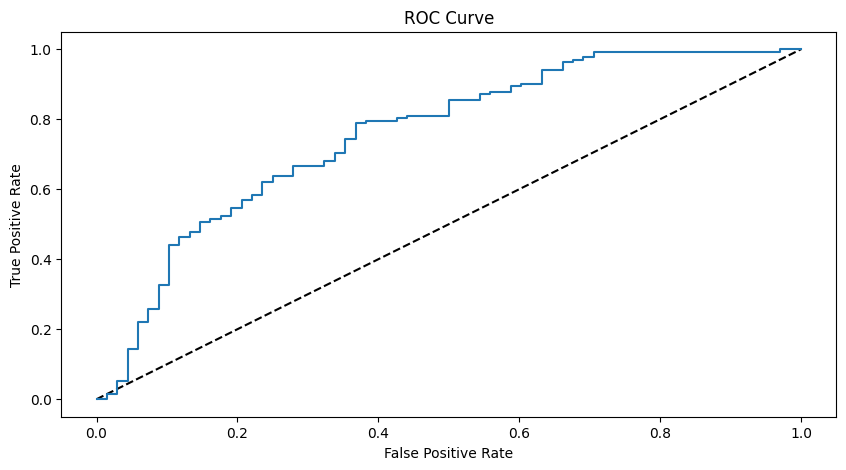

In [1055]:
#Predicting proba
y_pred_prob = xgb_model.predict_proba(x_test_cluster)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test_cluster, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Let plotting the ROC curve, based on the ROC curve, the model is good at. Now moving to the random forest regressor.

In [1056]:
param_tuning = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': [4, 7, 15, 20],
}

random_forest_model = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_tuning, n_iter=25, scoring='roc_auc')

Firstly, let use random search to find the best parameter for the random forest regressor. The tuning parameter is:
1. n_estimators
2. max_depth
3. max_features

To explain, the n_estimators is the number of trees in the forest. The max_depth is the maximum depth of the tree. The max_features is the number of features to consider when looking for the best split.

In [1057]:
random_forest_model.fit(x_train_cluster, y_train_cluster)
print(metrics.classification_report(y_test_cluster, random_forest_model.predict(x_test_cluster)))

              precision    recall  f1-score   support

           0       0.85      0.43      0.57        68
           1       0.77      0.96      0.85       132

    accuracy                           0.78       200
   macro avg       0.81      0.69      0.71       200
weighted avg       0.79      0.78      0.76       200



In [1058]:
print(metrics.precision_score(y_test_cluster, random_forest_model.predict(x_test_cluster) ))

0.7650602409638554


After tuning and using the model to train the data, the score is:
1. Accuracy: 0.79
2. Precision: 0.77
3. Recall: 0.95
4. F1 score: 0.85

In [1059]:
random_forest_model.best_estimator_

RandomForestClassifier(max_depth=10, max_features=7, n_estimators=700)

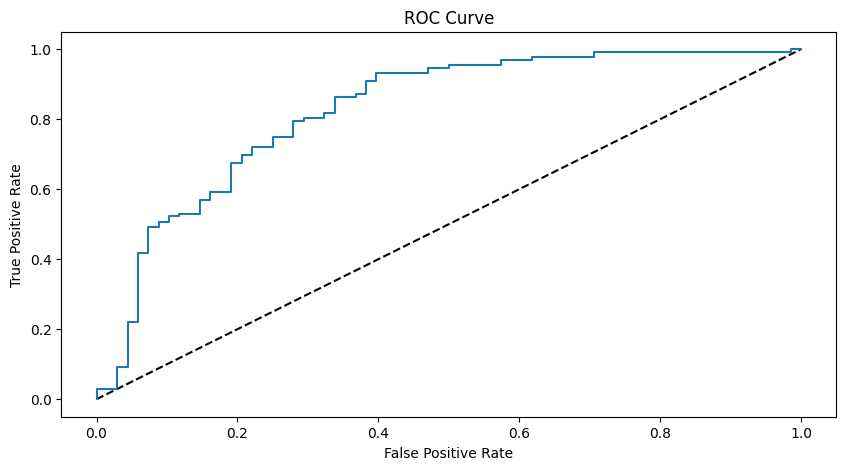

In [1060]:
#Predicting proba
y_pred_prob = random_forest_model.predict_proba(x_test_cluster)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test_cluster, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Now using the Roc curve to plot the model, the model is good at. The random forest regressor is better than the xgb regressor.